In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits 
import sep

### Open the File

In [64]:
fname = "Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


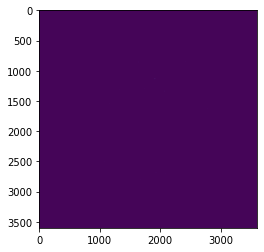

In [65]:
plt.imshow(hdu_list[0].data)

### Reduce the Noise

0.00079129904 0.054868452


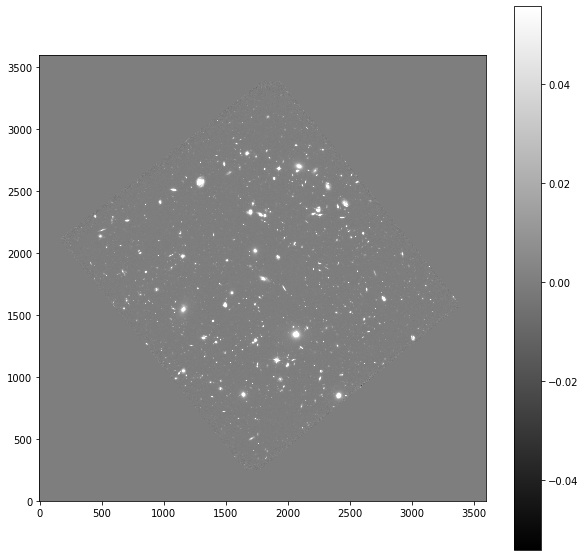

In [66]:
data = hdu_list[0].data
m, s = np.mean(data) , np.std(data)
print(m, s)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest' ,cmap='gray',  vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('raw_data.png')


### Calculate/Visualize the Backround

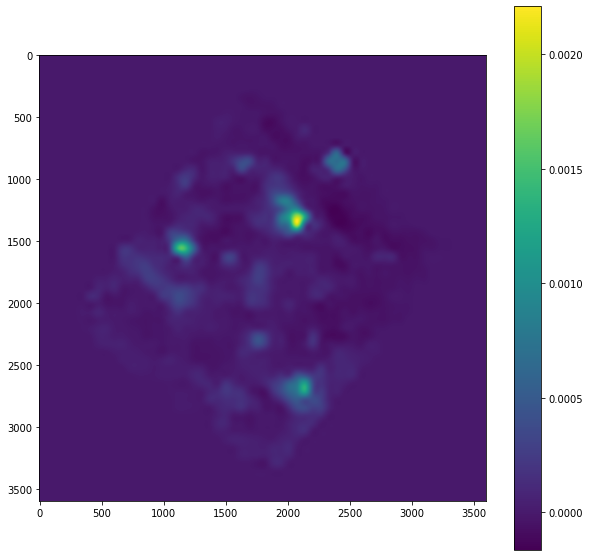

In [67]:
datasw = data.byteswap(False).newbyteorder() #big endian to little endian 
background = sep.Background(datasw)
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.colorbar()
plt.savefig('Background.png')


### Visualize Backround noise 

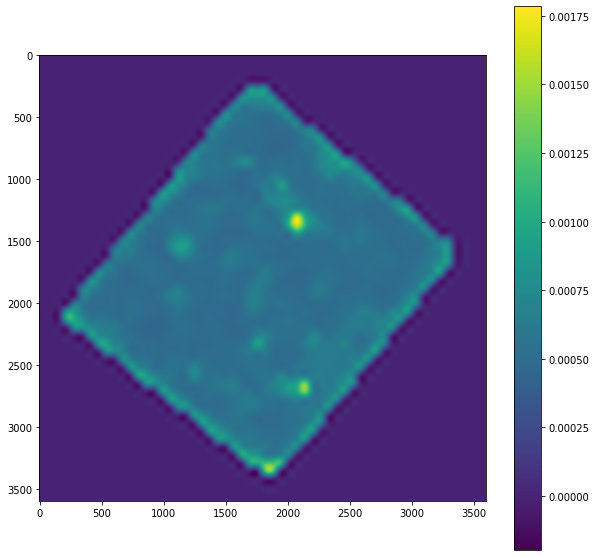

In [68]:
background_rms = background.rms()
plt.figure(figsize=(10,10))
plt.imshow(background_rms)
plt.colorbar()
plt.savefig('background_rms.png')


### Subtract backround from the image 

In [69]:
data_sub = data - backround 

### Identify data (i.e. the objects)

In [70]:
objects = sep.extract(data_sub, 1.5, err=background.globalrms) #allowed for what an object is
#how obj's found
len(objects)

8640

### 8640 objects found

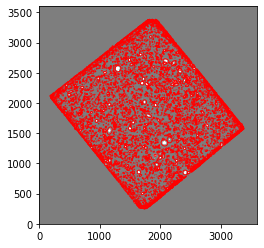

In [71]:
from matplotlib.patches import Ellipse 

#plot the image without the background
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('detected_sources.png')

### Flux Histogram 

In [72]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects ['y'], 3.0, err=background.globalrms, gain=1.0)

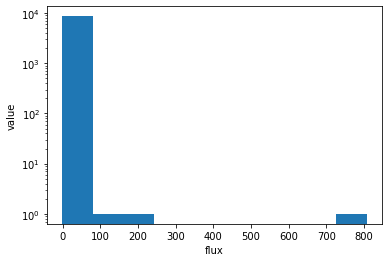

<Figure size 720x720 with 0 Axes>

In [73]:
plt.hist(flux)
plt.xlabel('flux')
plt.ylabel('value')
plt.yscale('log')
plt.figure(figsize=(10,10))
plt.show()